# COMS 4701 Summer 2021: Homework 2

**Instructions**: Solve all problems and type up your solutions in this notebook. Each solution should appear in a new cell immediately following the given problem. Written problems should include work and steps in addition to the answers; $\LaTeX$ is highly recommended, but plaintext is also acceptable if it is understandable. You are highly encouraged to read through the accompanying tutorial first if you are new to $\LaTeX$. Coding solutions should be free of errors, and outputs should be left in the notebook for submission.

All submitted work must be your own. Cases of academic dishonesty will be addressed following the policies outlined on the [course syllabus](https://courseworks2.columbia.edu/courses/131236).

# Problem 1: Hills and Valleys (20 points)

The following code is a simple implementation of a simulated annealing procedure to find the maximum of a mathematical function within a certain domain range. This function is defined in `obj` and looks like the following:

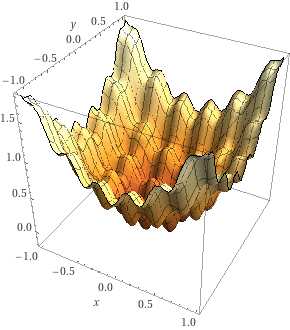

As you can see, there are lots of local maxima to navigate. The global maxima are located at the corners of the domain range; if we were to start our search near the origin, naive hill-climbing would quickly get stuck at a local maximum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def obj(state):
  x1 = state[0]
  x2 = state[1]
  return x1**2 + x2**2 - 0.1*np.cos(6*np.pi*x1) - 0.1*np.cos(6*np.pi*x2)

def neighbor(state):
  return np.clip(state + .2*np.random.rand(2)-.1, -1, 1)

def sim_anneal(T):
  X = np.empty((T,2))
  f = np.empty(T)
  current = np.array([0,0])

  for t in range(T):
    next = neighbor(current)
    delta = obj(next) - obj(current)
    if delta > 0 or np.random.rand() < np.exp(delta/schedule(t)): 
      current = next
    X[t] = current
    f[t] = obj(current)

  return X, f

def run():
  T = 1000
  X, f = sim_anneal(T)

  plt.figure()
  plt.plot(range(T), X[:,0], range(T), X[:,1])
  plt.title('State values x and y over time')

  plt.figure()
  plt.plot(f, 'g')
  plt.title('Objective function value over time')
  plt.show()

Your task is to complete the `schedule` procedure that determines the "temperature" as time passes. This parameter will then determine the probability that a suboptimal successor state is accepted (as opposed to not moving the current state at all). Note that we preemptively set the number of iterations (`T`) to 1000. You may modify this if you like, but it should not be necessary to do so. You do not need to modify any of the other procedures, although you should try to understand `sim_anneal`, which follows the pseudocode from lecture quite closely.

1.  Implement `schedule` as a decreasing linear function of `t` in the first code cell below. The return value should take the form $a-bt$, where $a$ and $b$ are positive constants of your choosing (although the value at $t=1000$ should be equal to 0). Show example output plots in the output of the code cell for the best schedule function you found. Describe your observations: Are we able to approach the global maximum at some point? Are we able to settle near the global maximum? Do we see convergent behavior toward the end? Why or why not?

2.  Implement `schedule` as a decreasing exponential function of `t` in the second code cell below. The return value should take the form $\exp(-ct)$, where $c$ is a positive constant of your choosing (but large enough so that the value at $t=1000$ is effectively 0). Show example output plots in the output of the code cell for the best schedule function you found. Describe your observations: Are we able to approach the global maximum at some point? Are we able to settle near the global maximum? Do we see convergent behavior toward the end? Why or why not?

ENTER YOUR RESPONSES HERE

Note: information about the simulated annealing function was taken from textbook section 4.1.2

1. Yes, we are able to approach the global maximum (~1.75) at some point. Yes, we are able to settle near the global maximum. Yes, we see convergent behavior toward the end. The structure of the simulated annealing algorithm works as such: it picks a random move and accepts this move if it improves the situation. Otherwise, the algorithm accepts the move with some probability less than 1. The probability decreases exponentially with the “badness” of the move. The probability also decreases as the “temperature” goes down: “bad” moves are more likely to be allowed at the start when is high, and they become more unlikely as decreases. If the schedule lowers to 0 slowly enough, then a property of the Boltzmann distribution, e^(deltaE/T), is that all the probability is concentrated on the global maxima, which the algorithm will find with probability approaching 1. This aligns with the schedule function created using small positive constants a=0.1 and b=0.0001. Larger constants such as 1000 or 100 created irregular graphs that did not converge or settle near the global maximum. Here, the schedule function is implemented as a decreasing linear function which ensures that the value at t=1000 is 0 and the temperature is lowered such that we can settle at the global maximum. 

2. Yes, we are able to approach the global maximum (~1.75) at some point. Yes, we are able to settle near the global maximum. Yes, we see convergent behavior toward the end. In addition to following the explanation of simulated annealing in the above question, this exponential schedule function decreases the probability of exploration by a lot and converges faster than the linear schedule function because of its exponential nature. This is shown by looking at the graphs (the objective function stabilized at 1.75  much faster than in the linear schedule function's graph).

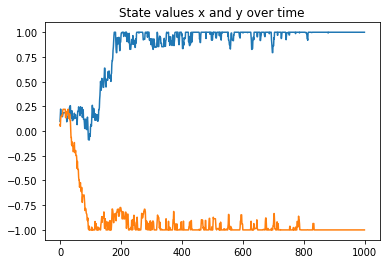

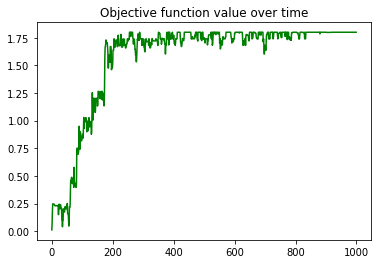

In [ ]:
def schedule(t):
  a = 0.1
  b = 0.0001
  return (a - (b*t))


run()

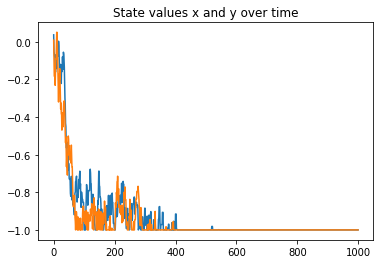

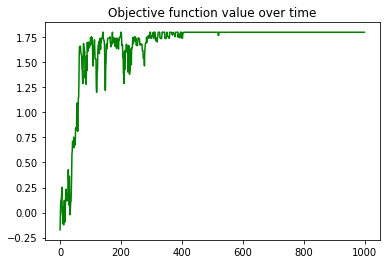

In [ ]:
def schedule(t):
  c = 0.01
  return np.exp(-c*t)


run()

# Problem 2: Yahtzee! (20 points)

We will consider a simplified version of the game of *Yahtzee*. We first roll three 4-sided dice (with results 1, 2, 3, 4 occurring with equal probability), and then we can either reroll one of the dice or keep the original result. Let $S$ be the sum of the final dice results. We get a score equal to the max over $S$ and one of the following, if the situation applies:

*   10 points for two-of-a-kind
*   15 points for three-of-a-kind
*   7 points for a series (1-2-3 or 2-3-4)

The expectimax tree representing the player's decision is shown below:

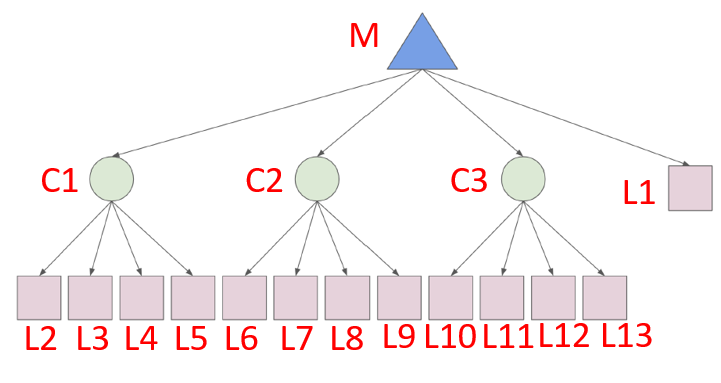


Suppose we initially rolled a 1, 2, and 4. From left to right, the second layer of the tree represents actions of rerolling the 1, rerolling the 2, rerolling the 4, and keeping the original dice results. The third layer represents the outcomes of each of the three die rerolls from 1 to 4 (going left to right for each).

1.  Fill in the values of the nodes of the tree (you can simply write out the values for each node variable, e.g. "M = 1"). Start with the utilities of the leaf nodes, followed by the chance nodes and finally the value at the root. What decision maximizes our expected score?

2.  Suppose we change the rules slightly. We can still either reroll a die or keep the initial results, but choosing the "reroll" action results in a **random** die being rerolled (we do not get to choose which). Describe precisely how the structure of the expectimax tree would change and say what the new optimal action is. You do not need to draw the new tree or compute new node values.

3.  Consider another change of rules. Instead of choosing one die to reroll, the options are to choose exactly **two** dice to reroll (we can indicate which two dice we want) or to keep the initial results. Describe precisely how the structure of the expectimax tree would change. You do not need to draw the new tree or compute new node values.

ENTER YOUR RESPONSES HERE

1. Rerolling the 1 maximizes our expected score.
*   L2 = 7
*   L3 = 10
*   L4 = 9
*   L5 = 10
*   L6 = 10
*   L7 = 7
*   L8 = 8
*   L9 = 10
*   L10 = 10
*   L11 = 10
*   L12 = 7
*   L13 = 7
*   C1 = 9
*   C2 = 8.75
*   C3 = 8.5
*   L1 = 7
*   M = 9

2.  The new expectimax tree would have 4 layers. The first (and top-most) layer has one max node M. The second layer will have one chance node C1 and one leaf node L1. C1 is to the left and represents the choice to reroll a die. L1 is to the right and represents the choice to keep the initial results. The third layer will have three chance nodes (C2, C2, C4) and only extend from C1. Each of these chance nodes will represent the opportunities to reroll the 1, 2, and 4, respectively. The value found at C1 is the average of C2, C3, C4. Each of these chance nodes in the third layer will be followed by four leaf nodes in the fourth layer. These leaf nodes (L2-13) represent the outcomes of each of the three die rerolls from 1 to 4 (going left to right for each). The value found at C2, C3, and C4 is the average of each of their four leaf nodes. The new optimal action is choosing to reroll a die. The value found at the root of this new tree is 8.75.

3.  The new expectimax tree would have 3 layers. The first layer has one max node M. The second layer will have three chance nodes C1, C2, C3 and one leaf node L1. Each of these chance nodes will represent the opportunities to reroll the 1 and 2, reroll the 1 and 4, and reroll the 2 and 4, respectively. Note that the order in which the die are rerolled doesn't matter. Each of these chance nodes in the second layer will be followed by 16 leaf nodes in the third layer. These leaf nodes (L2-49) represent the outcomes of rerolling two of the die specified by C1, C2, or C3. The value found at C1, C2, and C3 is the average of each of their 16 leaf nodes. In each of the 16 nodes, there would be 6 combinations that have the same numbers, but each of the 16 combinations would have an equal chance of being rolled, so all are considered when calculating C1, C2, and C3.

# *(m,n,k)*-Game

In this assignment you will design and play with a simple agent for a [*m,n,k*-game](https://en.wikipedia.org/wiki/M,n,k-game). This is a generalization of tic-tac-toe to a *m* x *n* board. As in tic-tac-toe, there are two players, X and O, and they take turns marking cells on the board. Here we will consider the "weak" version of the game: X's goal is to try to get *k*  *X*'s in a row, at which point it wins, while O's goal is to try to **prevent** X from winning and eliminate all possibilities for X to get *k* in a row. At that point, O wins.

This is a zero-sum game; a win for X is a loss for O and vice versa. We will take X to be the maximizing player and O to be the minimizing player, and unless otherwise specified, X always goes first. 

You'll find the game-specific functions ```actions```, ```result```, and ```terminal``` used by minimax and alpha-beta search below. The last one also calls the utility functions ```k_in_row``` and ```sequences```. Here are the details:

*   States are represented as 2d numpy arrays. Elements may be 'X', 'O', or '.' for blanks.
*   Taking an action means picking a blank space and marking it. ```actions``` returns all possible actions, or equivalently, all indices of blanks.
*   ```result``` creates and returns a new state with the indicated space filled in by the given player (either 'X' or 'O').
* ```terminal``` serves as both a terminal test and utility function to save some work. A state is terminal if either X has won or it is impossible for X to win. **We denote a state to be won by O if the union of X and blank squares do not contain any subsets of size *k* lying in a row.** (This does not capture all terminal states, as half the blanks would have to be taken by O in an actual game. We will not worry about being too precise here.) If the state is indeed terminal, the return value is 1 if X has won or -1 otherwise. If the state is not terminal, `None` is returned instead.

## Coding 1 (10 points)

Complete the `terminal` function so that it performs the task described above. The `k_in_row` utility function will be useful for determining whether X has won or has no more possibility to win; given a list of indices, it returns True or False to indicate whether there is a subset of size *k* that lie in a row.

As a hint, take a look at `actions` for an efficient way to obtain a specific set of indices on the game board.

In [53]:
import numpy as np

def actions(state):
  # Returns indices of all blank spaces on board
  return [i for i,s in np.ndenumerate(state) if s=='.']

def result(state, player, action):
  # Returns a new state (deepcopied) with action space taken by player
  new_state = state.copy()
  new_state[action] = player
  return new_state

def terminal(state, k): # account for blank spaces & return value
  # Test whether state is a terminal; return 1 or -1 if True and None if False
  # YOUR CODE HERE
  x_states = [i for i,s in np.ndenumerate(state) if s=='X']
  blank_states = actions(state)
  union = x_states + blank_states
  # X won
  if k_in_row(x_states,k) is True:
    # return 1
    return len(blank_states)
  # X lost
  elif k_in_row(union,k) is False:
    # return -1
    return -len(blank_states)
  # non-terminal
  else:
    return None


#-------------------------------------------------------------------------------
# Utility functions used by terminal (above)

def k_in_row(indices, k):
  # Test whether there are k consecutive indices in a row in the given list
  index_set = set(indices)
  for i in indices:
    for seq in sequences(i, k):
      if seq.issubset(index_set):
        return True
  return False

def sequences(i, k):
  # Return 4 sets of k indices in the "rows" starting from index i
  across = set([(i[0], i[1]+j) for j in range(k)])
  down = set([(i[0]+j, i[1]) for j in range(k)])
  diagdown = set([(i[0]+j, i[1]+j) for j in range(k)])
  diagup = set([(i[0]+j, i[1]-j) for j in range(k)])
  return across, down, diagdown, diagup

## Coding 2 (15 points)

We will now design an alpha-beta search agent to play this game. The skeleton functions below follow the pseudocode provided in the lecture and textbook very closely. The inclusion of *k* as an argument allows it to be passed into ```terminal```. Write the main loops of the ```max_value``` and ```min_value``` functions. Remember that the ```result``` function takes in a player argument, and that X is MAX while O is MIN.

In [58]:
def alpha_beta_search(state, player, k):
  # Initialize a game tree search for (m,n,k) game
  # X is maximizing player, O is minimizing player
  if player == 'X':
    value, move = max_value(state, -float("inf"), float("inf"), k)
  else:
    value, move = min_value(state, -float("inf"), float("inf"), k)
  return value, move

def max_value(state, alpha, beta, k):
  score = terminal(state, k)
  if score is not None:
    return score, None
  # YOUR CODE HERE
  v = -float("inf")
  for a in actions(state):
    v2, a2 = min_value(result(state, 'X', a), alpha, beta, k)
    if v2 > v:
      v, move = v2, a 
      alpha = max(alpha, v)
    if v >= beta:
      return v, move
  return v, move


def min_value(state, alpha, beta, k):
  score = terminal(state, k)
  if score is not None:
    return score, None
  # YOUR CODE HERE
  v = float("inf")
  for a in actions(state):
    v2, a2 = max_value(result(state, 'O', a), alpha, beta, k)
    if v2 < v:
      v, move = v2, a
      beta = min(beta, v)
    if v <= alpha:
      return v, move
  return v, move



You can test the functions above by either finding the values of terminal states or states close to terminal states, for which you know the winner with certainty. (Remember that states are 2d numpy arrays.) For example, in the (3,3,3) game, ```max_value``` of a state with two X's and a blank in a row should certainly return a move leading to a winning state for X. Same goes for ```min_value``` and O.

Once you're happy with your agent implementation, test it out in a full game. The following ```game_loop``` takes in an initial state, the value of *k*, the search algorithm to use (which for now is just ```alpha_beta_search``` and any additional parameters for the search algorithm (none for now). 

When it runs, ```game_loop``` simply goes back and forth between the two players. Each player plans its next move using ```search```, the move is executed, the state is updated, and the opposing player's turn is taken. This ends when we hit a terminal state.

In [59]:
def game_loop(state, k, search, X_params=[], O_params=[]):
  # Play a (m,n,k) game using provided search function and parameters
  player = 'X'
  score = None
  while score is None:
    if player == 'X':
      value, move = search(state, player, k, *X_params)
      state = result(state, player, move)
      player = 'O'
    else:
      value, move = search(state, player, k, *O_params)
      state = result(state, player, move)
      player = 'X'
    print(np.matrix(state), "\n")
    score = terminal(state, k)

  if value > 0: print("X wins!")
  else: print("O wins!")

Let's have our intelligent agent play against itself! Run the code below to play standard tic-tac-toe. Remember that both players play optimally, where X tries to get 3 in a row and O tries to prevent X from getting 3 in a row.

In [60]:
m, n, k = 3, 3, 3 
print((m,n,k))
initial = np.full((m,n), '.')
game_loop(initial, k, alpha_beta_search)

(3, 3, 3)
[['X' '.' '.']
 ['.' '.' '.']
 ['.' '.' '.']] 

[['X' 'O' '.']
 ['.' '.' '.']
 ['.' '.' '.']] 

[['X' 'O' '.']
 ['X' '.' '.']
 ['.' '.' '.']] 

[['X' 'O' '.']
 ['X' '.' '.']
 ['O' '.' '.']] 

[['X' 'O' '.']
 ['X' 'X' '.']
 ['O' '.' '.']] 

[['X' 'O' 'O']
 ['X' 'X' '.']
 ['O' '.' '.']] 

[['X' 'O' 'O']
 ['X' 'X' 'X']
 ['O' '.' '.']] 

X wins!


## Response 1 (5 points)

What was the result of the game? Assuming both players play optimally and X moves first, can a different player ever win? You may notice that the losing player does not seem to be "trying" very hard, particularly toward the end of the game. Why is this behavior still optimal?

ENTER YOUR RESPONSE HERE

After running the 3x3x3 game multiple times, the result is clear: X always wins. Assuming both players play optimally and X moves first, a different player can't win in this scenario. In this problem, the terminal function only returns values of -1 or 1, so the states are not weighted. Considering this, both agents end up choosing the first open blank space since neither of them are incentivized to win faster. The board fills up from top to bottom and left to right. This behavior ensures that X will always win if it starts the game. As explained in office hours, optimality in this problem can be defined as "if you can win, you do win". Here, based on the terminal function, the only two possible objectives is that the agent wins or loses. Player O doesn't seem to be "trying" very hard because the agent knows that there is no way for it to win. It looses in every future scenario so the player doesn't seem to try hard. The behavior of both agents is still optimal, however, because they are always picking the state with the best utility value and it is still optimal for Player O to loose since there is no way for this agent to win in this scenario.

Our code is suitable for any values of *m,n,k*. Below are three game instances to try out (you could also try more, although any board larger than 4x4 will probably take an unreasonable amount of time to finish). Run each scenario, think about the results, and answer the questions below.

In [61]:
# m, n, k = 2, 5, 3
# m, n, k = 3, 4, 3
m, n, k = 3, 4, 4
print((m,n,k))
initial = np.full((m,n), '.')
game_loop(initial, k, alpha_beta_search)

(3, 4, 4)
[['X' '.' '.' '.']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' '.' '.']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' '.']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' '.']
 ['O' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'X']
 ['O' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'X']
 ['O' '.' '.' '.']
 ['O' '.' '.' '.']] 

O wins!


## Coding 3 (5 points)

You may notice that the agents are typically in no rush to win or to prevent their opponent from winning. Come up with a simple change to the utilities returned by the `terminal` function that would encourage the agents to win via shorter games (fewer moves made). Implement this change and rerun the above games to verify that the game lengths are indeed shortened. Show the output of the (3,4,4) game.

In order to expand our agent's capacity to deal with boards larger than (4,4) in a reasonable amount of time, we have to accept some suboptimality. This means cutting off search using depth limiting, which in turn requires an evaluation function for non-terminal states. There is a standard set of strategies for tic-tac-toe which can inform what this looks like, but we'll go with a numerical rather than a rule-based function here.

In [62]:
def eval(state, k):
  X_indices = [i for i,s in np.ndenumerate(state) if s=='X']
  blanks = [i for i,s in np.ndenumerate(state) if s=='.']

  X_and_blanks = X_indices + blanks
  Xset = set(X_indices)
  Xbset = set(X_and_blanks)
  X_score = 0
  for i in X_and_blanks:
    for seq in sequences(i, k):
      if seq.issubset(Xbset):
        ratio = len(seq & Xset)/k
        X_score = max(X_score, ratio)
  
  return X_score

## Response 2 (5 points)

Please briefly describe a high-level interpretation of what this evaluation function is computing and returning. What does the `X_score` variable represent? As a hint, the conditional in the inner loop is triggered whenever there is a combination of *k* X's and blanks in a row. 

ENTER YOUR RESPONSE HERE

Generally, evaluation  functions  are estimates of a state’s utility. It will try to determine the estimated utility to reach a goal (or winning) state. In this problem, the evaluation function finds the largest sequence of X's in a row, column, or diagonal in the current state. The function is not concerned with the history of the state or explore possible moves forward. The evaluation function returns a ratio called X_score. X_score is a ratio between the length of the found sequence of X's and k. Since it is in a greater for loop, this variable is updated as every sequence in the board is checked. Essentially, X_score represents how far the current state is from a goal state since the eval function evaluates all potential actions from the current state and gives the sequence with the highest score.


## Coding 4 (10 points)

We will also need some new functions to implement alpha-beta depth-limited search. They will look very similar to the original functions with some minor changes. First, the search function will take a ```max_depth``` parameter. The two value functions will also take this, along with a current ```depth``` parameter. 

After the terminal check, the value functions should check whether the current depth has hit or exceeded the depth limit. If so, it should return the evaluation of the current state (along with no move as it is treated as a terminal). Complete these functions.

In [64]:
def alpha_beta_depth_search(state, player, k, max_depth):
  if player == 'X':
    value, move = max_value_depth(state, -float("inf"), float("inf"), k, 0, max_depth)
  else:
    value, move = min_value_depth(state, -float("inf"), float("inf"), k, 0, max_depth)
  return value, move

def max_value_depth(state, alpha, beta, k, depth, max_depth):
  score = terminal(state, k)
  if score is not None:
    return score, None
  # YOUR CODE HERE
  if depth >= max_depth:
    return eval(state, k), None
  v = -float("inf")
  for a in actions(state):
    v2, a2 = min_value_depth(result(state, 'X', a), alpha, beta, k, depth+1, max_depth)
    if v2 > v:
      v, move = v2, a 
      alpha = max(alpha, v)
    if v >= beta:
      return v, move
  return v, move


def min_value_depth(state, alpha, beta, k, depth, max_depth):
  score = terminal(state, k)
  if score is not None:
    return score, None
  # YOUR CODE HERE
  if depth >= max_depth:
    return eval(state, k), None
  v = float("inf")
  for a in actions(state):
    v2, a2 = max_value_depth(result(state, 'O', a), alpha, beta, k, depth+1, max_depth)
    if v2 < v:
      v, move = v2, a
      beta = min(beta, v)
    if v <= alpha:
      return v, move
  return v, move


We can now try our hand a larger boards, provided that we sufficiently limit the search depth. Of course, we now lose any guarantee of optimality, and we may get different results when using different depths. We have three games below calling ```alpha_beta_depth_search```. Search depths of 5 are the default max depths, but you'll be trying a few other combinations when answering the following questions.

In [67]:
#m, n, k = 4, 4, 3
#m, n, k = 4, 4, 4
m, n, k = 5, 5, 4
print((m,n,k))
initial = np.full((m,n), '.')
max_depth_X = 5
max_depth_O = 5
game_loop(initial, k, alpha_beta_depth_search, [max_depth_X], [max_depth_O])

(5, 5, 4)
[['X' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' '.' 'X' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' '.' 'X' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' 'O' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' 'X' 'X' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' 'O' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' 'X' 'X' '.']
 ['.' '.' 'O' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' 'O' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' 'X' 'X' 'X']
 ['.' '.' 'O' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' 'O' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' 'X' 'X' 'X']
 ['.' '.' 'O' '.' '.']
 ['.' 'O' '.' '.' '.']
 ['.' '.' '.' 'O' '.']
 ['.' '.' '.' '.' '.']] 

[['X' 'O' 'X' 'X' 'X']
 ['X' '.' 'O' '.' '.']


## Response 3 (10 points)

Please answer each of the questions below.

1.   Consider the (4,4,3) game. If X can search up to depth 5, is it possible to increase O's search depth sufficiently to allow it to beat X? Why or why not? What if X's search depth is decreased (try different values)?

2.   Consider the (4,4,4) and (5,5,4) games. You might find that as long as X is constrained to a reasonable search depth (e.g., < 8), it always ends up losing, even if O's search depth is just 1 move ahead. Why is this the case?



ENTER YOUR RESPONSES HERE

1.  It is not possible to increase O's search depth sufficiently to allow it to beat X. Consider the goals of X and O in this game: X's goal is to try to get k X's in a row, at which point it wins, while O's goal is to try to prevent X from winning and eliminate all possibilities for X to get k in a row. At that point, O wins. Even if we increase O's search depth, it won't be able to beat X since X is able to win within 5 steps – which is below the max_depth value – and O's goal is to block X from winning. If O is unable to prevent X from winning at a max_depth of 5, increasing the depth won't change this. Since this is a minimax algorithm, increasing the search depth would not lead to a different outcome since X would have won already. Note that the search depth for X needs to be large enough for X to be able to explore the pathway to the winning sequence. This is embodied when looking at the different depth values: if X's search depth is decreased to 1, X wins; however, if X's search depth is decreased to 2 < depth < 5, O wins and X loses. 

2.  The (4,4,4) and (5,5,4) games end with O winning. These two boards increase the k value to 4, making it harder for X to win the game with 4 X's in a row. Meanwhile, O has a broader range of blank spaces to choose from and it is easier for O to block X's moves. In other words, it is easier for O to eliminate all ways for X to win but harder for X to get 4 in a row, even if O is just one depth move ahead. X needs a larger search depth to find a winning pathway and thus it is easier for O to block X and win.